<a href="https://colab.research.google.com/github/Shivansh-Uppal/Deep-learning/blob/main/dysgraphia_version_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd

In [3]:
df=pd.DataFrame(columns=['path','label']) #empty df
l=[]

#reading dysgraphic images
for dirname,_,filenames in os.walk(
        r"/content/drive/MyDrive/Senior Major Project/Disgraphic"):

    for filename in filenames:
        l.append([os.path.join(dirname,filename),"disgraphic"])

df=pd.DataFrame(l,columns=['path','label'])

#reading normal images
for dirname,_,filenames in os.walk(
       r"/content/drive/MyDrive/Senior Major Project/Normal"):

   for filename in filenames:
        l.append([os.path.join(dirname,filename),"normal"])

df=pd.DataFrame(l,columns=['path','label'])

#shuffle for no prediction on basis of pattern
df=df.sample(frac=1).reset_index(drop=True)

df.head(10)

,path,label
0,/content/drive/MyDrive/Senior Major Project/Di...,disgraphic
1,/content/drive/MyDrive/Senior Major Project/No...,normal
2,/content/drive/MyDrive/Senior Major Project/No...,normal
3,/content/drive/MyDrive/Senior Major Project/Di...,disgraphic
4,/content/drive/MyDrive/Senior Major Project/No...,normal
5,/content/drive/MyDrive/Senior Major Project/No...,normal
6,/content/drive/MyDrive/Senior Major Project/No...,normal
7,/content/drive/MyDrive/Senior Major Project/Di...,disgraphic
8,/content/drive/MyDrive/Senior Major Project/No...,normal
9,/content/drive/MyDrive/Senior Major Project/No...,normal


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

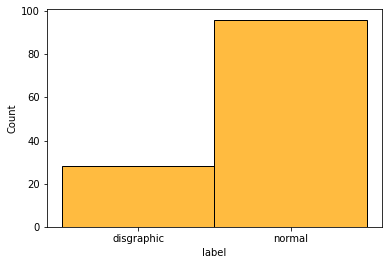

In [5]:
sns.histplot(data=df['label'],color='orange')
plt.show()

In [6]:
df['label'].value_counts()

normal        96
disgraphic    28
Name: label, dtype: int64

In [7]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
generator=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.1,
    horizontal_flip=True
)

In [9]:
train_gen=generator.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(128,128),class_mode='binary',
                                     subset='training',color_mode='rgb',batch_size=16)

val_gen=generator.flow_from_dataframe(df,x_col='path',y_col='label',target_size=(128,128),class_mode='binary',
                                     subset='validation',color_mode='rgb',batch_size=16)

Found 112 validated image filenames belonging to 2 classes.
Found 12 validated image filenames belonging to 2 classes.


In [10]:
train_gen.class_indices.keys()

dict_keys(['disgraphic', 'normal'])

In [11]:
class_indices={}

for key in train_gen.class_indices.keys():
    class_indices[train_gen.class_indices[key]]=key #reversing the keys and values

print(class_indices) #printing the class indices

{0: 'disgraphic', 1: 'normal'}


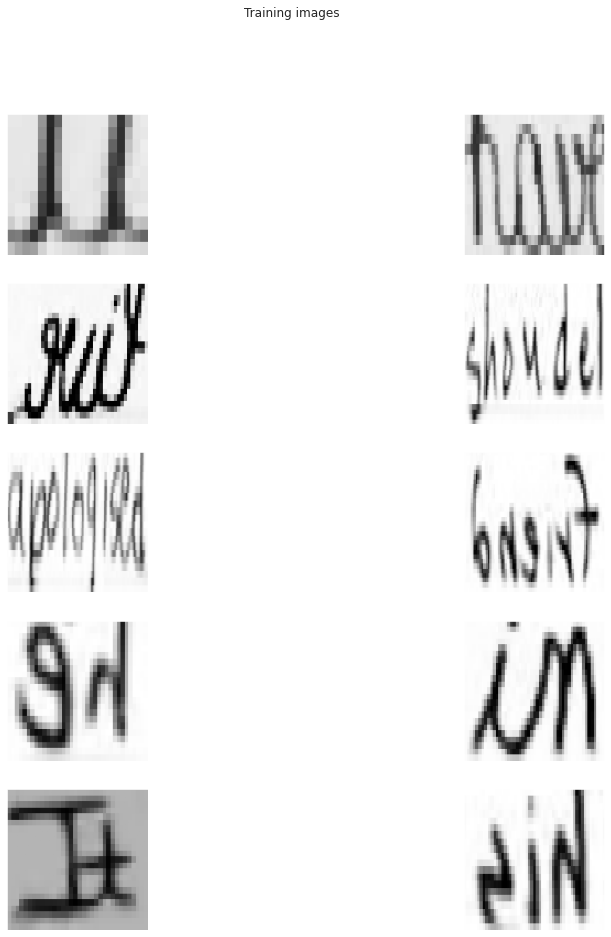

In [12]:
sns.set_style('dark')

pics=10
fig,ax=plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Training images')
ax=ax.ravel()

for i in range((pics//2)*2):
    ax[i].imshow(train_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [13]:
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [14]:
model=Sequential()

model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[128,128,3],padding='same'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [15]:
from tensorflow.keras.metrics import Recall, AUC
from tensorflow.keras.utils import plot_model

In [16]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy',Recall(),AUC()])

In [17]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [18]:
reduce_lr_on_plateau=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=10)
#ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving.

In [19]:
model.fit(train_gen,validation_data=val_gen,steps_per_epoch=train_gen.samples//16,
          epochs=20,callbacks=[reduce_lr_on_plateau],validation_steps=val_gen.samples//2)

Epoch 1/20
7/7 [==============================] - ETA: 0s - loss: 0.8303 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.4003

7/7 [==============================] - 63s 7s/step - loss: 0.8303 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.4003 - val_loss: 0.6667 - val_accuracy: 0.6667 - val_recall: 1.0000 - val_auc: 0.7500 - lr: 0.0010
Epoch 2/20
7/7 [==============================] - ETA: 0s - loss: 0.5321 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.4659

7/7 [==============================] - 0s 40ms/step - loss: 0.5321 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.4659 - lr: 0.0010
Epoch 3/20
7/7 [==============================] - ETA: 0s - loss: 0.5614 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.4100

7/7 [==============================] - 0s 38ms/step - loss: 0.5614 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.4100 - lr: 0.0010
Epoch 4/20
6/7 [========================>.....] - ETA: 0s - loss: 0.5105 - accuracy: 0.8125 - recall: 1.0000 - auc: 0.5516

7/7 [==============================] - 0s 42ms/step - loss: 0.5369 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.4908 - lr: 0.0010
Epoch 5/20
7/7 [==============================] - ETA: 0s - loss: 0.5131 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.5750

7/7 [==============================] - 0s 41ms/step - loss: 0.5131 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.5750 - lr: 0.0010
Epoch 6/20
7/7 [==============================] - ETA: 0s - loss: 0.4903 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.6366

7/7 [==============================] - 0s 42ms/step - loss: 0.4903 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.6366 - lr: 0.0010
Epoch 7/20
6/7 [========================>.....] - ETA: 0s - loss: 0.5517 - accuracy: 0.8021 - recall: 1.0000 - auc: 0.6770

7/7 [==============================] - 0s 44ms/step - loss: 0.5688 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.6792 - lr: 0.0010
Epoch 8/20
7/7 [==============================] - ETA: 0s - loss: 0.5627 - accuracy: 0.8036 - recall: 1.0000 - auc: 0.7292

7/7 [==============================] - 0s 41ms/step - loss: 0.5627 - accuracy: 0.8036 - recall: 1.0000 - auc: 0.7292 - lr: 0.0010
Epoch 9/20
7/7 [==============================] - ETA: 0s - loss: 0.5758 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.4683

7/7 [==============================] - 0s 41ms/step - loss: 0.5758 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.4683 - lr: 0.0010
Epoch 10/20
7/7 [==============================] - ETA: 0s - loss: 0.5145 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.6174

7/7 [==============================] - 0s 41ms/step - loss: 0.5145 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.6174 - lr: 0.0010
Epoch 11/20
7/7 [==============================] - ETA: 0s - loss: 0.4419 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.7789

7/7 [==============================] - 0s 40ms/step - loss: 0.4419 - accuracy: 0.7857 - recall: 1.0000 - auc: 0.7789 - lr: 0.0010
Epoch 12/20
6/7 [========================>.....] - ETA: 0s - loss: 0.3874 - accuracy: 0.8125 - recall: 1.0000 - auc: 0.8226

7/7 [==============================] - 0s 48ms/step - loss: 0.4061 - accuracy: 0.8036 - recall: 1.0000 - auc: 0.8146 - lr: 0.0010
Epoch 13/20
7/7 [==============================] - ETA: 0s - loss: 0.3705 - accuracy: 0.8036 - recall: 0.9773 - auc: 0.8648

7/7 [==============================] - 0s 43ms/step - loss: 0.3705 - accuracy: 0.8036 - recall: 0.9773 - auc: 0.8648 - lr: 0.0010
Epoch 14/20
7/7 [==============================] - ETA: 0s - loss: 0.4238 - accuracy: 0.8214 - recall: 0.9091 - auc: 0.8364

7/7 [==============================] - 0s 47ms/step - loss: 0.4238 - accuracy: 0.8214 - recall: 0.9091 - auc: 0.8364 - lr: 0.0010
Epoch 15/20
6/7 [========================>.....] - ETA: 0s - loss: 0.3911 - accuracy: 0.8229 - recall: 1.0000 - auc: 0.8014

7/7 [==============================] - 0s 62ms/step - loss: 0.4102 - accuracy: 0.8036 - recall: 1.0000 - auc: 0.8085 - lr: 0.0010
Epoch 16/20
7/7 [==============================] - ETA: 0s - loss: 0.3244 - accuracy: 0.8393 - recall: 1.0000 - auc: 0.9081

7/7 [==============================] - 0s 53ms/step - loss: 0.3244 - accuracy: 0.8393 - recall: 1.0000 - auc: 0.9081 - lr: 0.0010
Epoch 17/20
7/7 [==============================] - ETA: 0s - loss: 0.3003 - accuracy: 0.8393 - recall: 0.9659 - auc: 0.9044

7/7 [==============================] - 0s 44ms/step - loss: 0.3003 - accuracy: 0.8393 - recall: 0.9659 - auc: 0.9044 - lr: 0.0010
Epoch 18/20
7/7 [==============================] - ETA: 0s - loss: 0.2461 - accuracy: 0.8839 - recall: 0.9659 - auc: 0.9368

7/7 [==============================] - 0s 44ms/step - loss: 0.2461 - accuracy: 0.8839 - recall: 0.9659 - auc: 0.9368 - lr: 0.0010
Epoch 19/20
7/7 [==============================] - ETA: 0s - loss: 0.2495 - accuracy: 0.9196 - recall: 0.9886 - auc: 0.9408

7/7 [==============================] - 0s 43ms/step - loss: 0.2495 - accuracy: 0.9196 - recall: 0.9886 - auc: 0.9408 - lr: 0.0010
Epoch 20/20
7/7 [==============================] - ETA: 0s - loss: 0.2244 - accuracy: 0.9107 - recall: 0.9545 - auc: 0.9571

7/7 [==============================] - 0s 42ms/step - loss: 0.2244 - accuracy: 0.9107 - recall: 0.9545 - auc: 0.9571 - lr: 0.0010


In [20]:
model.predict(val_gen)

1/1 [==============================] - 0s 146ms/step


array([[0.92294884],
       [0.6072679 ],
       [0.97545755],
       [0.772851  ],
       [0.9996056 ],
       [1.        ],
       [0.9900502 ],
       [0.693777  ],
       [0.9672902 ],
       [0.8118607 ],
       [0.99987173],
       [0.9977659 ]], dtype=float32)

In [21]:
val_gen.class_indices.keys()

dict_keys(['disgraphic', 'normal'])

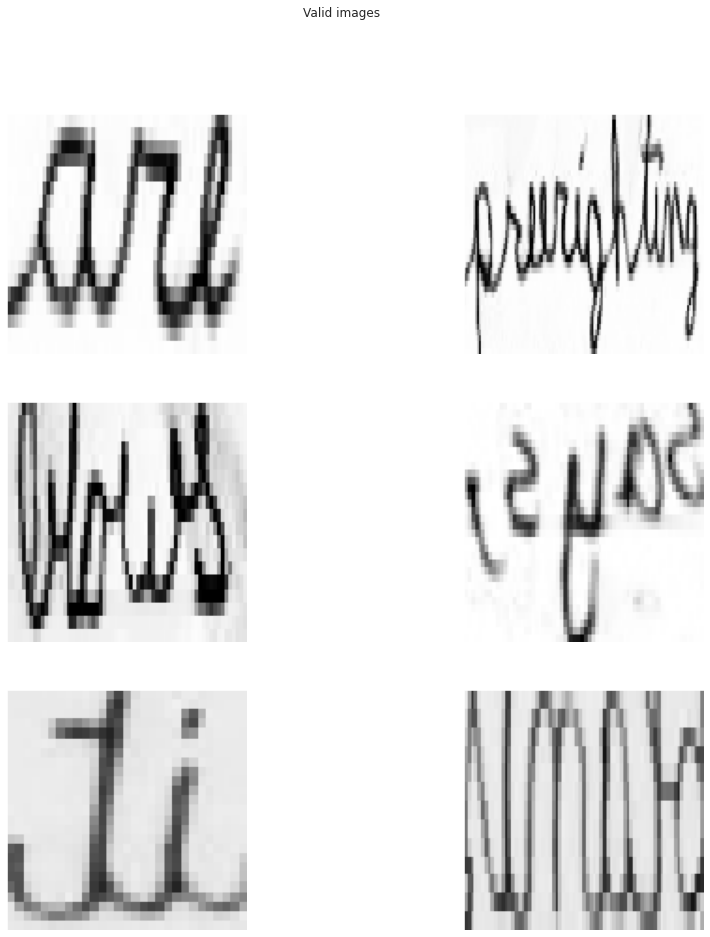

In [22]:
sns.set_style('dark')

pics=6
fig,ax=plt.subplots(int(pics//2),2,figsize=(15,15))
plt.suptitle('Valid images')
ax=ax.ravel()

for i in range((pics//2)*2):
    ax[i].imshow(val_gen[0][0][i])
    ax[i].axes.xaxis.set_visible(False)
    ax[i].axes.yaxis.set_visible(False)

In [23]:
!pip install keras_preprocessing

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 KB 4.8 MB/s eta 0:00:00


In [26]:
from keras_preprocessing import image
import tensorflow as tf
from tensorflow import keras

import plotly.express as px
import plotly.graph_objects as go
from PIL import Image
from matplotlib.image import imread

In [29]:
test_image=load_img(r"/content/Screen-Shot-2022-02-23-at-3.04.50-PM.png",
                          target_size=(128,128))

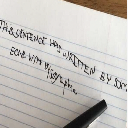

In [30]:
test_image

In [31]:
test_image=img_to_array(test_image)

In [32]:
test_image=test_image/255

In [33]:
import numpy as np

In [34]:
test_image=np.expand_dims(test_image,axis=0)

In [35]:
result=model.predict(test_image)

if result>0.5:
    print("Normal")

else:
    print("disgraphic")

1/1 [==============================] - 0s 21ms/step
Normal


In [24]:
import os
import numpy as np
from tensorflow.keras.utils import img_to_array,load_img
from sklearn.metrics import classification_report, confusion_matrix

# Set up the paths to your image directory and label file
image_dir = "/content/drive/MyDrive/Senior Major Project/Normal"
label_file = ""

# Load the labels from the label file into a dictionary
labels = {}
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        labels[filename] = 1


# Initialize lists to store the true and predicted labels
true_labels = []
pred_labels = []

# Loop over the images in the directory and preprocess them
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        # Load the image and preprocess it
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img)
        preprocessed_img = img_array.reshape((1,) + img_array.shape)
        
        # Get the true label for the image
        true_label = labels[filename]
        true_labels.append(true_label)
        
        # Predict the label for the image using your model
        pred_probs = model.predict(preprocessed_img)[0]
        if(pred_probs<0.5):
          pred_label=0
        else:
          pred_label=1
        pred_labels.append(pred_label)

# Print the classification report
print(classification_report(true_labels, pred_labels, zero_division=0))

# Generate the confusion matrix
confusion_mat = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(confusion_mat)


1/1 [==============================] - 0s 20ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.99      0.99        96

    accuracy                           0.99        96
   macro avg       0.50      0.49      0.50        96
weighted avg       1.00      0.99      0.99        96

Confusion Matrix:
[[ 0  0]
 [ 1 95]]


In [25]:
import os
import numpy as np
from tensorflow.keras.utils import img_to_array,load_img
from sklearn.metrics import classification_report, confusion_matrix

# Set up the paths to your image directory and label file
image_dir = "/content/drive/MyDrive/Senior Major Project/Disgraphic"
label_file = ""

# Load the labels from the label file into a dictionary
labels = {}
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        labels[filename] = 0


# Initialize lists to store the true and predicted labels
true_labels = []
pred_labels = []

# Loop over the images in the directory and preprocess them
for filename in os.listdir(image_dir):
    if filename.endswith(".png"):
        # Load the image and preprocess it
        img_path = os.path.join(image_dir, filename)
        img = load_img(img_path, target_size=(128, 128))
        img_array = img_to_array(img)
        preprocessed_img = img_array.reshape((1,) + img_array.shape)
        
        # Get the true label for the image
        true_label = labels[filename]
        true_labels.append(true_label)
        
        # Predict the label for the image using your model
        pred_probs = model.predict(preprocessed_img)[0]
        if(pred_probs<0.5):
          pred_label=0
        else:
          pred_label=1
        pred_labels.append(pred_label)

# Print the classification report
print(classification_report(true_labels, pred_labels, zero_division=0))

# Generate the confusion matrix
confusion_mat = confusion_matrix(true_labels, pred_labels)
print("Confusion Matrix:")
print(confusion_mat)


1/1 [==============================] - 0s 36ms/step
              precision    recall  f1-score   support

           0       1.00      0.64      0.78        28
           1       0.00      0.00      0.00         0

    accuracy                           0.64        28
   macro avg       0.50      0.32      0.39        28
weighted avg       1.00      0.64      0.78        28

Confusion Matrix:
[[18 10]
 [ 0  0]]
